In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
%matplotlib inline
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn import model_selection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [2]:
df = pd.read_csv("Data_VC.csv")
df.head(2)

,Fund_Size,Fund_Number_Overall,Fund_Number_Series,GDP_yoy,TR_10yrs,yoy_MSCI,Firm_Age,Funds_Raised_Last_Year,Pcent_Increase_Funds_Last_Year,Local_Currency_USD,Local_Currency_EUR,Fund_Focus_US,Fund_Focus_Europe,Fund_Focus_Asia,Geographic_Scope_Diversified,Industry_Diversified,PME,VC_Specialized
0,-0.222539,1,1,0.656718,1.414006,-0.379895,-0.681453,-1.372205,1.072021,1,0,1,0,0,0,0,0.0,0
1,-0.294924,5,3,0.775701,0.759936,-1.437382,1.577624,0.081859,1.486475,1,0,0,1,0,0,0,0.0,0


In [3]:
feature_cols = df.columns[df.columns != "PME"]
X = df[feature_cols]
y = df["PME"]
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, stratify=y)

In [4]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [5]:
# prepare models
models = []
models.append(('LR', LogisticRegression(random_state=0)))
models.append(('LDA', LinearDiscriminantAnalysis()))
#models.append(('CART', DecisionTreeClassifier()))
#models.append(('NB', GaussianNB()))
models.append(('QDA', QuadraticDiscriminantAnalysis()))
models.append(('SVC', SVC(kernel='linear', probability=True, random_state=0)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('MLP', MLPClassifier(hidden_layer_sizes=(30,30,30))))

# Compairing Accuracy

C:\Users\rishi\.conda\envs\jupLab\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR: 0.546137 (0.045480)
LDA: 0.529484 (0.043246)
QDA: 0.491728 (0.037098)
SVC: 0.553699 (0.036954)
KNN: 0.582419 (0.031430)


C:\Users\rishi\.conda\envs\jupLab\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rishi\.conda\envs\jupLab\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rishi\.conda\envs\jupLab\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rishi\.conda\envs\jupLab\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rishi\.conda\envs\jupLab\li

MLP: 0.579429 (0.027504)


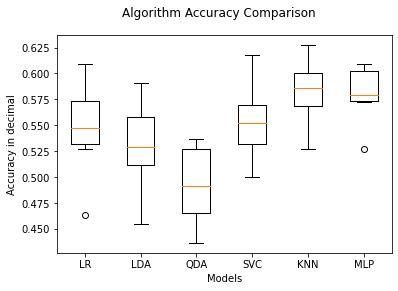

In [6]:
seed = 42
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=6, shuffle= True, random_state=0)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Accuracy Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.xlabel('Models')
plt.ylabel('Accuracy in decimal')
plt.savefig("Accuracy_comp_VC")
plt.show()

# compairing Precision

C:\Users\rishi\.conda\envs\jupLab\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR: 0.520737 (0.064375)
LDA: 0.494026 (0.058014)
QDA: 0.470463 (0.039491)
SVC: 0.541803 (0.084784)
KNN: 0.554183 (0.065223)


C:\Users\rishi\.conda\envs\jupLab\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rishi\.conda\envs\jupLab\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rishi\.conda\envs\jupLab\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rishi\.conda\envs\jupLab\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rishi\.conda\envs\jupLab\li

MLP: 0.608405 (0.119976)


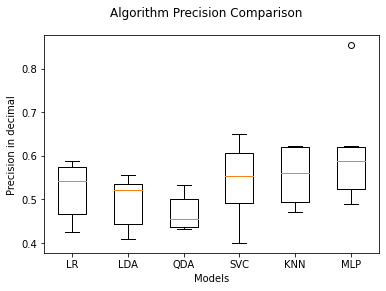

In [7]:
seed = 42
# evaluate each model in turn
results = []
names = []
scoring = 'precision'
for name, model in models:
	kfold = model_selection.KFold(n_splits=6,shuffle=True, random_state=0)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Precision Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.xlabel('Models')
plt.ylabel('Precision in decimal')
plt.savefig("Precision_comp_VC")
plt.show()

# Neural network

In [8]:
feature_cols = df.columns[df.columns != "PME"]
X = df[feature_cols]
y = df["PME"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, stratify=y)

In [9]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))
mlp.fit(X_train, y_train)
mlp_predictions = mlp.predict(X_test)


C:\Users\rishi\.conda\envs\jupLab\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [10]:
confusion_matrix(y_test,mlp_predictions)

array([[57, 32],
       [40, 37]], dtype=int64)

In [11]:
mlp.score(X_test, y_test)

0.5662650602409639

In [12]:
print(classification_report(y_test, mlp_predictions))

              precision    recall  f1-score   support

         0.0       0.59      0.64      0.61        89
         1.0       0.54      0.48      0.51        77

    accuracy                           0.57       166
   macro avg       0.56      0.56      0.56       166
weighted avg       0.56      0.57      0.56       166



<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3fba76e2-4979-46d6-894e-df4c618edcd3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>